In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from IPython.display import Image, display_html
import seaborn as sns
sns.set()
plt.tight_layout()

np.set_printoptions(suppress=True)

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline;margin-right:30px"'),raw=True)

<Figure size 576x396 with 0 Axes>

## Loading data

We first need to read the data and check out its contents. Here we load the data in a dataframe using pandas.

In [6]:
!pwd

/content


In [7]:
# Load the dataset into a dataframe for ease of manipulation
df = pd.read_csv("sample_data/kc_house_data.csv")
# Let's check out some of the data samples
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


## Terminologies and Downsizing 
In Data science, rows are referred to as data samples and columns as features. The feature we for which we are going to predict the values is known as target variable.

Here in order to demonstrate a simple regression we cut down on the total number of features, which also serves the purpose of feature removal (to improve prediction accuracy) which will be explained later in this tutorial series. 

    Feature1: Bathrooms
    Feature2: Bedrooms
    Feature3: Floors
    Feature4: Square foot of living area
    Feature5: Latitude
    Feature6: Longitude
    Target Variable : Price

In [8]:
# For now, let's work with only a few columns/features
df_new = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'lat', 'long', 'price']]
df_new.head()

,bedrooms,bathrooms,sqft_living,floors,lat,long,price
0,3,1.00,1180,1.0,47.5112,-122.257,221900.0
1,3,2.25,2570,2.0,47.7210,-122.319,538000.0
2,2,1.00,770,1.0,47.7379,-122.233,180000.0
3,4,3.00,1960,1.0,47.5208,-122.393,604000.0
4,3,2.00,1680,1.0,47.6168,-122.045,510000.0


In [9]:
## We separate out the target variable and the input features into separate dataframes. 
Y = df_new[["price"]]
X = df_new[["bathrooms","bedrooms","floors","sqft_living", "lat", "long"]]

display_side_by_side(X.head(), Y.head())

bathrooms 
 bedrooms 
 floors 
 sqft_living 
 lat 
 long 
 
 
 
 
 0 
 1.00 
 3 
 1.0 
 1180 
 47.5112 
 -122.257 
 
 
 1 
 2.25 
 3 
 2.0 
 2570 
 47.7210 
 -122.319 
 
 
 2 
 1.00 
 2 
 1.0 
 770 
 47.7379 
 -122.233 
 
 
 3 
 3.00 
 4 
 1.0 
 1960 
 47.5208 
 -122.393 
 
 
 4 
 2.00 
 3 
 1.0 
 1680 
 47.6168 
 -122.045 
 
 
 
 
 
 
 price 
 
 
 
 
 0 
 221900.0 
 
 
 1 
 538000.0 
 
 
 2 
 180000.0 
 
 
 3 
 604000.0 
 
 
 4 
 510000.0

## Dataframe to Numpy
We need to convert the dataframes to separate numpy matrices because the libraries which will be used in the downstream tasks require numpy matrices as input

In [0]:
Y = Y.values
X = X.values

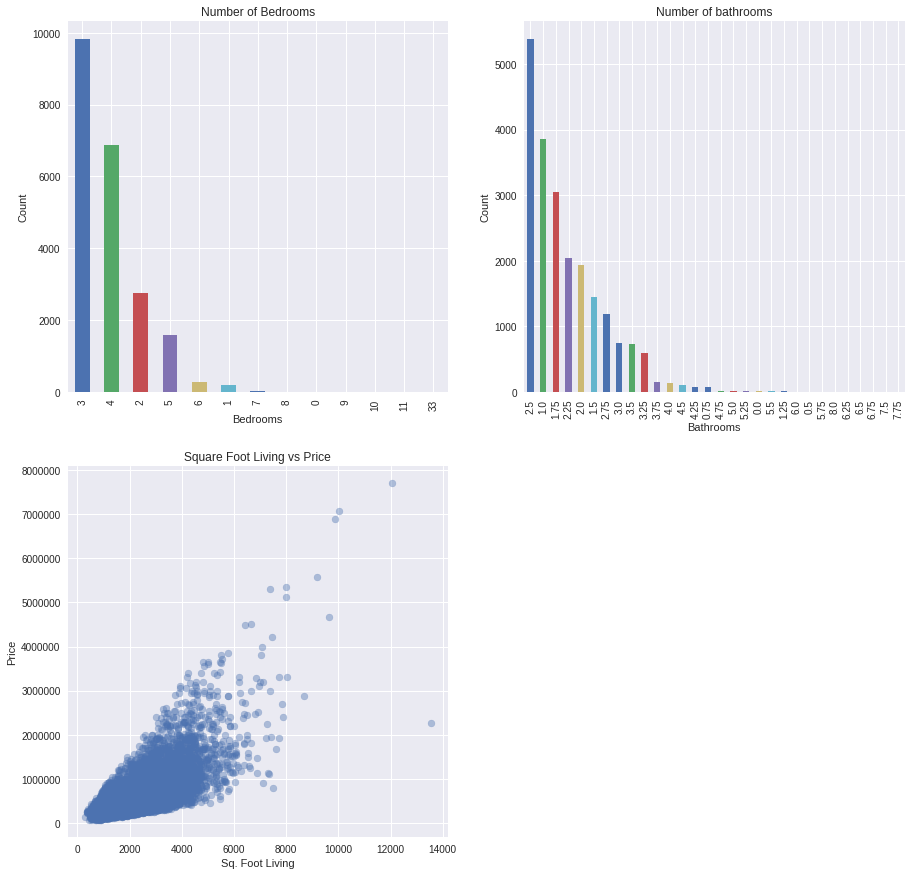

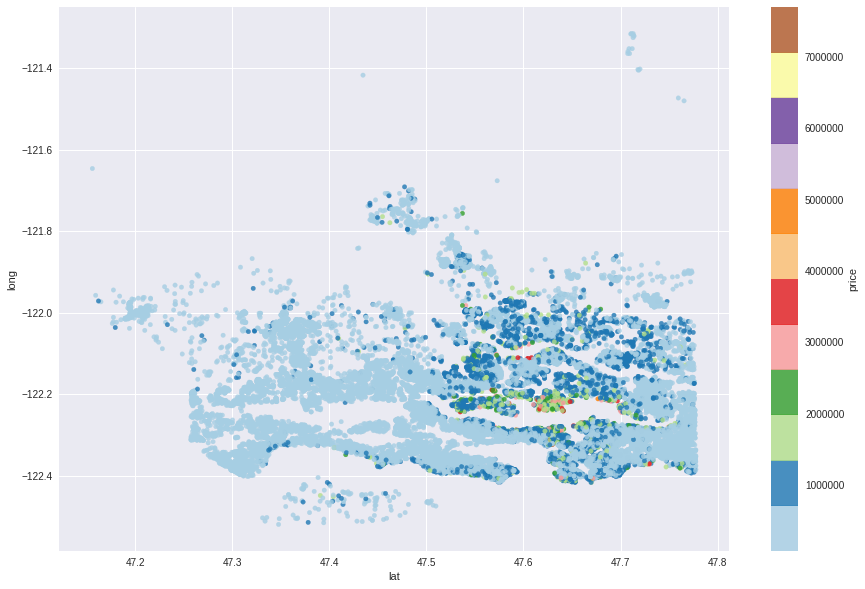

In [11]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
# fig, ax = plt.subplots(2, 2)

# Plot out the features
plt.subplot(2, 2, 1)
df_new['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
# plt.show()

plt.subplot(2, 2, 2)
df_new['bathrooms'].value_counts().plot(kind='bar')
plt.title('Number of bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
# plt.show()

plt.subplot(2, 2, 3)
plt.scatter(df_new['sqft_living'].values, df_new['price'].values, alpha=0.4)
plt.title('Square Foot Living vs Price')
plt.xlabel('Sq. Foot Living')
plt.ylabel('Price')
plt.show()

# plt.subplot(2, 2, 4)
df_new.plot(kind="scatter", x="lat", y="long", alpha=0.8, c="price", cmap=plt.get_cmap("Paired"), colorbar=True, sharex=False, figsize=(15,10))
plt.show()

In [0]:
# We need to scale the matrices for faster convergence of linear regression
scaler1 = StandardScaler()
scaler2 = StandardScaler()

data_X = scaler1.fit_transform(X)
data_Y = scaler2.fit_transform(Y)

In [0]:
# Divide the data into training and testing matrices
X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=0)

In [0]:
# Instantiate the linear regression model
reg = LinearRegression()
# Now we make the model learn on the training dataset
reg.fit(X_train, Y_train)
# Perform prediction on the test set
predict = reg.predict(X_test)

In [0]:
# Calculate the mean squared error between our prediction and the actual values
print("MSE:"+str(mean_squared_error(predict, Y_test))+"\n")

# Let's check out some of the predicted and actual values
predict_inv, Y_test_inv = scaler2.inverse_transform(predict), scaler2.inverse_transform(Y_test)
print("<Predicted>\t<Actual>")
for i in range(10):
    print("%.2f\t%.2f" % (predict_inv[i][0],  Y_test_inv[i][0]))

MSE:0.36627932745111647

<Predicted>	<Actual>
525137.93	297000.00
1367914.04	1578000.00
515630.87	562100.00
402915.58	631500.00
1015497.07	780000.00
452976.17	485000.00
369327.91	340000.00
505583.14	335606.00
527529.08	425000.00
1312836.54	490000.00


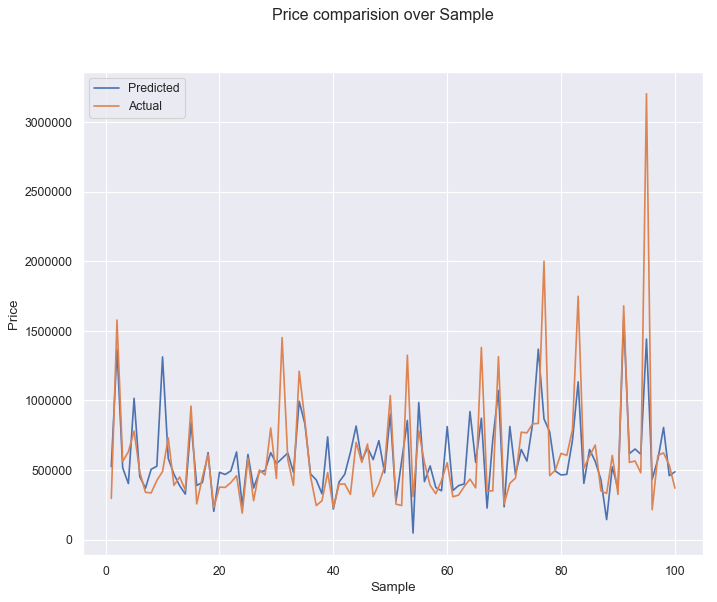

In [0]:
# We can also plot a graph of the first 100 price values
fig = plt.figure(figsize=(10, 8), dpi=80)
plt.plot([i for i in range(1, 101)], predict_inv[:100], label="Predicted")
plt.plot([i for i in range(1, 101)], Y_test_inv[:100], label="Actual")
plt.legend()
fig.suptitle('Price comparision over Sample')
plt.xlabel('Sample')
plt.ylabel('Price')
plt.show()

In [0]:
mse_list = []
# Let's check out the effect of increasing the feature degress, i.e. adding squared, cubic, etc features
for i in range(1,6):
    poly = PolynomialFeatures(i)
    # Increase the degree of the existing feature and add it as another feature
    X_poly = poly.fit_transform(X)
    # Scale the new dataset
    scaler = StandardScaler()
    X_poly = scaler.fit_transform(X_poly)
    # Split the dataset into training and testing
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, data_Y, test_size=0.2, random_state=0)

    reg = LinearRegression()
    reg.fit(X_train, Y_train)

    predict = reg.predict(X_test)
    print("MSE : {} with degree{}".format(mean_squared_error(predict, Y_test), i))
    mse_list.append(mean_squared_error(predict, Y_test))

MSE : 0.36627932745111647 with degree1
MSE : 0.2922970092075624 with degree2
MSE : 0.23372109975289945 with degree3
MSE : 0.20883208699701067 with degree4
MSE : 0.2596687914351162 with degree5


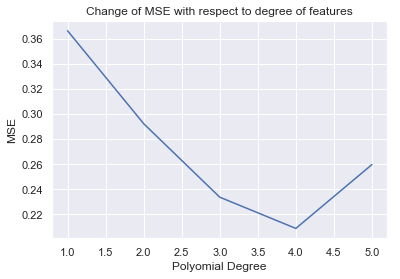

In [0]:
# We can plot the error for each type of feature degree
plt.plot([i for i in range(1, 6)], mse_list)
plt.title('Change of MSE with respect to degree of features')
plt.xlabel('Polyomial Degree')
plt.ylabel('MSE')
plt.show()